<a href="https://colab.research.google.com/github/jackelinegregorio/codigos-em-python/blob/main/Portf%C3%B3lio_Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Retorno')

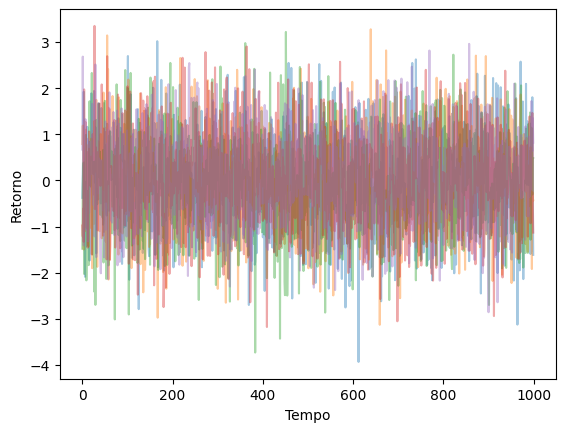

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
np.random.seed(500)
solvers.options['show_progress'] = False

#numero de avaliações
n_assets = 5

#numero de observações
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

return_vec.T

plt.plot(return_vec.T, alpha=.4);
plt.xlabel('Tempo')
plt.ylabel('Retorno')

[0.20501215 0.23601364 0.19114482 0.14671775 0.22111164]
[0.04195866 0.39105153 0.13052618 0.13109652 0.30536711]


Text(0.5, 1.0, 'Carteiras geradas aleatoriamente')

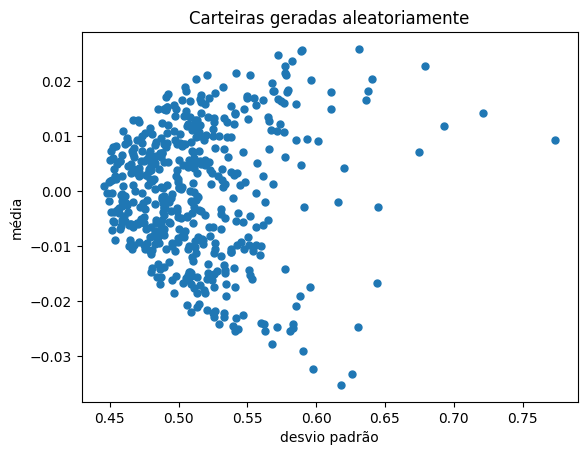

In [2]:
def rand_weights(n):
    a = np.random.rand(n)
    return a/sum(a)

print(rand_weights(n_assets))
print (rand_weights(n_assets))

def random_portfolio(returns):

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w*p.T
    sigma = np.sqrt(w * C * w.T)
    
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

n_portfolios = 500
means, stds = np.column_stack([random_portfolio(return_vec) for _ in range(n_portfolios)])

plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('desvio padrão')
plt.ylabel('média')
plt.title('Carteiras geradas aleatoriamente')

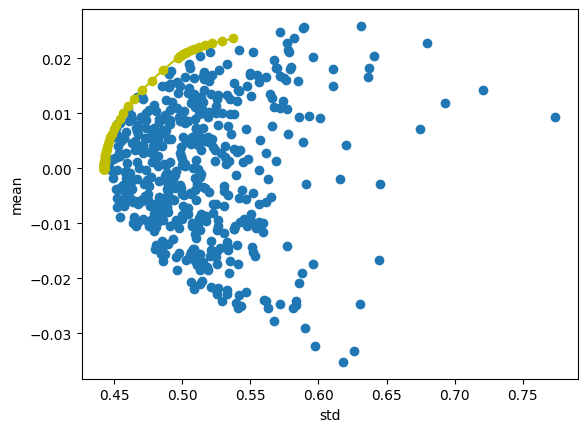

In [3]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Converte para matrizes
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Cria matrizes de restrição
    G = -opt.matrix(np.eye(n))
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Pesos de fronteira eficientes usando programação quadrática
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    # Calcula o risco e o retorno pela fronteira
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    
    # Calculando o portfólio ideal
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')